# NLP TOOLS FOR TEXT MINING 

# Overview of developed NLP tools

__Language Identification__ <br>
_(1) detect_identification()_ : Identify language<br>
_(2) visualize_languages()_ : Word cloud of languages<br>
***
__Text cleansing__ <br>
_(1) clean_data_en()_ : Clean text only in English<br>
_(2) clean_data_langs()_  : Clean text in different languages<br>
***
__Sentiment analysis__ <br>
_sentiment_analyzer()_ : Sentiment analysis<br>
_sentiment_analyzer_langs()
***
__Emoji detection & quantification__ <br>
_(1) extract_emojis()_ : Identifying emojis in text<br>
_(2) emoji_quantification()_ : Emoji frequency distribution <br>
_(3) emoji_class()_: Classification of emojis <br>
***
__Geographic information__ <br>
_extract_geoinfo()_ : Detecting geographic information
***
__Fetch mentions & hashtags__ <br>
_(1) fetch_hashtags()_ : Detecting hashtags<br>
_(2) fetch_mentions()_ : Detecting mentions<br>
_(3) total_hashtags_mentions()_ : Total number of hashtags and mentions<br>
***
__Relevant terms (TF/IDF)__ <br>
_relevant_feat()_ : Returns most relevant words in bag of comments based on TF/IDF
***
__Topic modelling-LDA__ <br>
_topic_extraction()_ : Topic detection using LDA<br>
_evaluate_topics()_ : Comparing relevant topics using relevant words<br>
_search_phrase()_ : Check for meaning of 2 word phrases detected as relevant features in topic modelling


# Installing packages

In [ ]:
#For language identification
!pip install iso-639
!pip install langdetect
!pip install emoji

In [ ]:
#For visualizing strings e.g languages
!pip install wordcloud

In [ ]:
#Data cleaning 
!pip install nltk
!pip install googletrans #Translation
!pip install textblob

In [ ]:
#Sentiment analysis
!pip install vaderSentiment
!pip install polyglot
!pip install PyICU
!pip install pycld2
!pip install Morfessor
!polyglot download sentiment2.es #Model for Spanish
!polyglot download sentiment2.en #Model for English
!polyglot download sentiment2.de #Model for German
!polyglot download sentiment2.pt #Model for Portuguese
!polyglot download sentiment2.nl #Model for Dutch (this might take time)

In [ ]:
#Geographic information
!conda install -c conda-forge spacy --yes
!python -m spacy download en_core_web_lg
!python -m spacy link en_core_web_lg en

# Loading packages

In [1]:
#For handling data structures
import pandas as pd
import numpy as np

In [7]:
#Packages for language identification
import emoji #Dealing with emojis
from langdetect import detect #To obtain the language code
from iso639.iso639 import Iso639 #To obtain the language full name

In [ ]:
#Data visualisation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# For data cleaning
import string
import nltk
nltk.download('all') 
from nltk.tokenize import word_tokenize #for spliting sententences into words
from nltk.corpus import stopwords #Handling stopwords
from nltk.stem.porter import * #for stemming words
from googletrans import Translator #Translation
from textblob import Word
import re #Regular expressions

In [27]:
#Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from polyglot.downloader import downloader
from polyglot.text import Text

In [110]:
#Emoji analysis
import emoji
from langdetect import detect
from iso639 import languages
from emoji import UNICODE_EMOJI
from collections import Counter #frequency distribution

In [11]:
#Used for extracting geographic information 
import spacy #could be used for other NLP methods
#from mordecai import Geoparser #There seems to be technical problems with the constructor

In [6]:
#Relevant words and topic modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
#Checking for 2 phrase words
from nltk.corpus import wordnet as wn

# Loading data sets

There were 3 data sets used to test the developed NLP tools. The next 3 cells are previews of the 3 data sets 

In [2]:
#Loading in the first profile
profile1 = pd.read_csv("DATA_PROFILE_1_COMMENTS.txt",delimiter="|")
print("There are {} interactions".format(len(profile1)))
profile1.head()

There are 75022 interactions


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT
0,katespadeny,2019-01-01_13-52-16,0,-1,@kdany_paredes 💖
1,katespadeny,2019-01-01_13-52-16,0,0,@mayte_sanders es nuestro año 🙌🏽💕
2,katespadeny,2019-01-01_13-52-16,1,-1,"I got this email from you guys, and I LOVED it..."
3,katespadeny,2019-01-01_13-52-16,2,-1,Love this!
4,katespadeny,2019-01-01_13-52-16,3,-1,Still thinking of Kate ♥️


In [3]:
#Loading in the second profile
profile2 = pd.read_csv("DATA_PROFILE_2_COMMENTS.txt",delimiter="|")
print("There are {} interactions".format(len(profile2)))
profile2.head()

There are 6310 interactions


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT
0,expedia,2019-01-01_15-00-23,0,-1,Puerto Rico! 🇵🇷
1,expedia,2019-01-01_15-00-23,1,-1,"Toronto, Canada 🇨🇦 Thank you Expedia! Would NO..."
2,expedia,2019-01-01_15-00-23,2,-1,Are you currently down?
3,expedia,2019-01-01_15-00-23,3,-1,Cool! Take a look at my profile ✨
4,expedia,2019-01-01_15-00-23,4,-1,Beautiful!! 💥💥💥


In [4]:
#Loading in the third profile
profile3 = pd.read_csv("DATA_PROFILE_3_COMMENTS.txt",delimiter="|")
print("There are {} interactions".format(len(profile3)))
profile3.head()

There are 7007 interactions


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT
0,designwithinreach,2019-01-01_18-33-59,0,-1,👍
1,designwithinreach,2019-01-01_18-33-59,1,-1,Good original design - we’ll take it! Let’s ke...
2,designwithinreach,2019-01-01_18-33-59,2,-1,Amazing creative
3,designwithinreach,2019-01-01_18-33-59,3,-1,💯💯💯
4,designwithinreach,2019-01-01_18-33-59,4,-1,#happynewyear #designwithinreach #dwr #modernd...


# First objective : Language identification 

In [108]:
#########################################################################
#
# Description:
#            Function takes in a text and returns the language name. The
#            comments which are made up only of emojis, the function
#            will return the name "Emoji".
#
# Input: 
#      Comment to a post or reply to a comment
#
# Output: 
#       Full name of language or 'Emoji' (if detected)
#
# Libraries:
#          emoji, detect, Iso639
#
#########################################################################

def detect_lang(comment):
    no_emj = emoji.get_emoji_regexp().sub(u'', comment)
    if len(no_emj)>0:
        lang_code = detect(no_emj)
        language = languages.get(alpha2=lang_code)
        name = language.name
        return name
    else:
        return "Emoji"

In [111]:
#Test of function detect_lang()
datasets = [profile1, profile2, profile3]
for profile_indx in range(0,len(datasets)):
    print("####################")
    print("Test for profile {}".format(profile_indx+1))
    for i in range(0, 5):
        print(detect_lang(datasets[profile_indx].loc[i,"COMMENT"]))

####################
Test for profile 1
Indonesian
Spanish
English
English
English
####################
Test for profile 2
Spanish
English
English
English
Romanian
####################
Test for profile 3
Emoji
English
English
Emoji
English


In [22]:
#########################################################################
#
# Description:
#            This function is used to generate a wordcloud of all available
#            detected languages in comments
#
# Input:
#       data (pandas dataframe), feature_name (text column)
#
# Output:
#       Wordcloud
#
# Libraries:
#          matplotlib, WordCloud
#
# Warning: 
#        Comments with only emoji(s) will display "Emoji" in the wordcloud
############################################################################     
def visualize_languages(data, feature_name):
    language_vec = []
    try:
        for i in range(0, len(data)):
            detected_lang = detect_lang(data.loc[i, feature_name])
            language_vec.append(detected_lang)
    except:
        print("Encountered an an unkown language")
    try:
        all_langs =(" ").join(language_vec) 
    except:
        print("ARGUMENT_ERROR: feature_name must contain only strings")
    wordcloud = WordCloud(width = 1000, height = 500).generate(all_langs) 
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()

Encountered an an unkown language


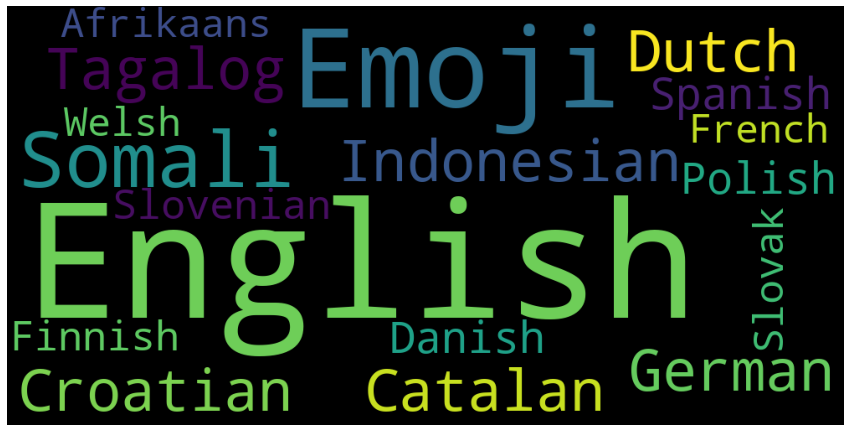

Encountered an an unkown language


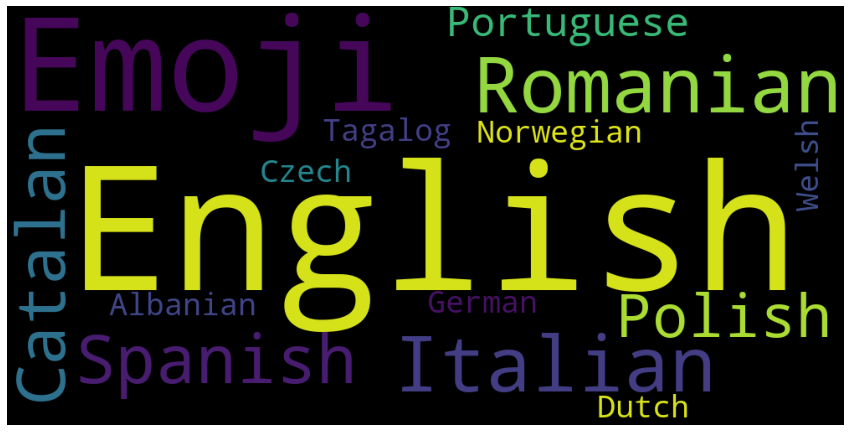

Encountered an an unkown language


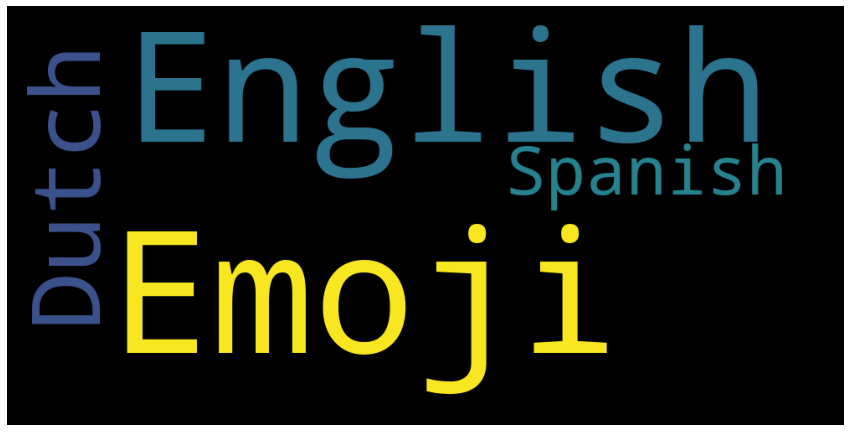

In [24]:
#Testing the visualize_languages()
datasets = [profile1, profile2, profile3]
for data in datasets:
    visualize_languages(data[0:100], "COMMENT")

# Second objective : Text cleansing

Two text cleansing functions were developed in this section. The first, ensures all the comments are translated to English prior to applying 
other preprocessing methods. The second, recognizes English, Portuguese, Dutch, Spanish, French and German prior to applying the other preprocessing methods

In [11]:
#############################################################################################
# Description: 
#            This function performs text cleansing on the text column of the dataframe. The 
#            cleansing methods used are usernames, puntuation elimination, normalization of
#            letter cases, elimination of stop words and lematization.
# Input: 
#      data (Pandas data frame) and feature_name (Name of the text column)
# Output: 
#       Dataset with the new column of cleaned comments (all in English)
# Libraries:
#          re, nltk, word_tokenize, stopwords
# Warning:
#        The resulting cleaned text will be in English
#        It might take over an hour in case there are thousands of observations
##############################################################################################

def clean_data_en(data, feature_name):
    cleaned_comments = []
    translator = Translator()
    stemmer = PorterStemmer()
    for comment_indx in range(0,len(data)):
        translation = translator.translate(data.loc[comment_indx,feature_name])
        comment = translation.text
        #Removing usernames in comments
        comment = re.sub(r"@(\w+)", "",comment)
        #Handling punctuation
        table = str.maketrans('','',string.punctuation)
        tokens = word_tokenize(comment)
        no_punct = [word.translate(table) for word in tokens]
        #Normalization of cases
        norm_cases = [word.lower() for word in no_punct]
        #Handling stopwords
        stop_words = stopwords.words("english")
        no_stopwords = [w for w in norm_cases if not w in stop_words]
        #Lematization
        words = [Word(word).lemmatize("v") for word in no_stopwords]
        cleaned_comments.append(" ".join(words))
    data["Cleaned_comments"] = cleaned_comments
    return data
    
                       

In [79]:
#Testing clean_data() function
clean_data1 = clean_data_en(profile1[0:50], "COMMENT")
clean_data1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,katespadeny,2019-01-01_13-52-16,0,-1,@kdany_paredes 💖,💖
1,katespadeny,2019-01-01_13-52-16,0,0,@mayte_sanders es nuestro año 🙌🏽💕,year 🙌🏽💕
2,katespadeny,2019-01-01_13-52-16,1,-1,"I got this email from you guys, and I LOVED it...",get email guy love thank
3,katespadeny,2019-01-01_13-52-16,2,-1,Love this!,love
4,katespadeny,2019-01-01_13-52-16,3,-1,Still thinking of Kate ♥️,still think kate ♥️


In [52]:
clean_data2 = clean_data_en(profile2[0:50], "COMMENT")
clean_data2.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,expedia,2019-01-01_15-00-23,0,-1,Puerto Rico! 🇵🇷,puerto rico 🇵🇷
1,expedia,2019-01-01_15-00-23,1,-1,"Toronto, Canada 🇨🇦 Thank you Expedia! Would NO...",toronto canada 🇨🇦 thank expedia would ever b...
2,expedia,2019-01-01_15-00-23,2,-1,Are you currently down?,currently
3,expedia,2019-01-01_15-00-23,3,-1,Cool! Take a look at my profile ✨,cool take look profile ✨
4,expedia,2019-01-01_15-00-23,4,-1,Beautiful!! 💥💥💥,beautiful 💥💥💥


In [54]:
clean_data3 = clean_data_en(profile3[0:50], "COMMENT")
clean_data3.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,designwithinreach,2019-01-01_18-33-59,0,-1,👍,👍
1,designwithinreach,2019-01-01_18-33-59,1,-1,Good original design - we’ll take it! Let’s ke...,good original design ’ take let ’ keep fight...
2,designwithinreach,2019-01-01_18-33-59,2,-1,Amazing creative,amaze creative
3,designwithinreach,2019-01-01_18-33-59,3,-1,💯💯💯,💯💯💯
4,designwithinreach,2019-01-01_18-33-59,4,-1,#happynewyear #designwithinreach #dwr #modernd...,happynewyear designwithinreach dwr modernd...


In [12]:
##############################################################################
#
# Description:
#            Processes the data text data while taking into consideration 
#            different languages (English, Portoguese, Dutch, Spanish, French
#            German)
#
# Input:
#      data (Pandas dataframe), feature_name (text column)
#
# Output: 
#       Dataframe with new column ("Cleaned_comments") in different languages
#       detected in the previous text
#
# Warning:
#        The new dataframe might end up with less rows because rows with detected 
#        languages not included in the specified set of languages will be deleted
#        This function still needs improvement
#
####################################################################################

def clean_data_langs(data, feature_name):
    cleaned_comments_indx = []
    cleaned_comments = []
    stemmer = PorterStemmer()
    langs = ["english", "portuguese", "dutch", "spanish", "french", "german"]
    #Eliminating comments in language not in the specified list of languages
    for comment_indx in range(0,len(data)):
        comment = data.loc[comment_indx,feature_name]
        try:
            detected_lang = detect_lang(comment).lower()
        except:
            detected_lang = "ERROR"
        for lang in langs:
            if lang == detected_lang and len(comment)>0:
                cleaned_comments_indx.append(comment_indx)
            else:
                pass
    data_new = data.drop(cleaned_comments_indx)
    data_new = data_new.reset_index(drop=True)
    #Other text cleaning methods
    for comment_indx2 in range(0, len(data_new)):
        comment2 = data_new.loc[comment_indx2, feature_name]
        #Removing usernames in comments
        comment2 = re.sub(r"@(\w+)", "",comment2)
        #Handling punctuation
        table = str.maketrans('','',string.punctuation)
        tokens = word_tokenize(comment2)
        no_punct = [word.translate(table) for word in tokens]
        #Normalization of cases
        norm_cases = [word.lower() for word in no_punct]
        #Handling stopwords
        try:
            detected_lang = detect_lang(" ".join(norm_cases)).lower()
        except:
            detected_lang = "ERROR"
        no_stopwords = []
        for lang in langs:
            if detected_lang != "emoji" or detected_lang == lang:
                stop_words = stopwords.words(lang)
                no_stopwords = [w for w in norm_cases if not w in stop_words]
        #Lematization
        words = [Word(word).lemmatize("v") for word in no_stopwords]
        cleaned_comments.append(" ".join(words))
    data_new["Cleaned_comments"] = cleaned_comments
    data_new = data_new.loc[data_new["Cleaned_comments"] != '',:]
    data_new = data_new.reset_index(drop=True)
    return data_new
    

In [175]:
clean_data_langs1 = clean_data_langs(profile1[0:50], "COMMENT")
clean_data_langs1.head()

,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,katespadeny,2019-01-01_13-52-16,7,-1,I don’t have a best friend,i don ’ t have a best friend
1,katespadeny,2019-01-01_13-52-16,16,-1,@crystal.j.austin @natlu_ @ek_vitality @gisell...,jaustin
2,katespadeny,2019-01-01_13-52-16,18,-1,@katjakamphuis weet je nog... hee lekkerding!,weet je nog hee lekkerding
3,katespadeny,2019-01-01_13-52-16,22,-1,@maria.k.au @reenasarpal ❤️,kau ❤️
4,katespadeny,2019-01-01_13-52-16,23,23,@monicagreeneyez23 just talk to people,just talk to people


In [166]:
clean_data_langs2 = clean_data_langs(profile2[0:50], "COMMENT")
clean_data_langs2.head()

,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,expedia,2019-01-01_15-00-23,4,-1,Beautiful!! 💥💥💥,beautiful 💥💥💥
1,expedia,2019-01-01_15-00-23,26,-1,Patagonia ❤,patagonia ❤
2,expedia,2019-01-01_15-00-23,29,-1,st lucia !!!!,st lucia
3,expedia,2019-01-04_18-00-18,1,-1,Any cupons??,any cupons
4,expedia,2019-01-07_18-00-14,0,-1,Nice photos👌,nice photos👌


There seem to be a problem testing this function on the 3rd profile. I get a language exception error saying there are not features found in comment index 12. This was very wierd because there is actual text available as can be seen in the cell after.

In [177]:
clean_data_langs3 = clean_data_langs(profile3[0:50].reset_index(drop=True), "COMMENT")
clean_data_langs3.head(10)

,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,designwithinreach,2019-01-02_21-25-53,6,-1,⭐️⚡️⚡️⚡️,⭐️⚡️⚡️⚡️
1,designwithinreach,2019-01-04_03-23-11,7,-1,#sharktank,sharktank
2,designwithinreach,2019-01-04_15-17-32,1,-1,I love it !!!,i love it
3,designwithinreach,2019-01-04_15-17-32,3,-1,Amazing !!! 👌🔥💥👌🔥💥,amaze 👌🔥💥👌🔥💥
4,designwithinreach,2019-01-07_00-15-43,3,-1,Very slick,very slick
5,designwithinreach,2019-01-07_00-15-43,5,-1,Dashing,dash
6,designwithinreach,2019-01-07_00-15-43,7,-1,Nice,nice
7,designwithinreach,2019-01-07_00-15-43,9,-1,Interessante,interessante


# Third objective : Sentiment analysis

In [40]:
##############################################################################################
# Description:
#            This function takes in a text, then returns a sentiment label i.e "Positive" if 
#            sentiment compound score > 0; "Negative" if sentiment compound score < 0 and 
#            "Neutral" is sentiment compound score = 0
# Input: 
#      Comment to post or reply
# Output: 
#       Positive (compount sentiment score > 0); Neutral (compount sentiment score==0) and 
#       Negative (compount sentiment score < 0)
# Libraries:
#          SentimentIntensityAnalyzer from vaderSentiment, Translator from googletrans 
##############################################################################################

def sentiment_analyzer(comment):
    try:
        translator = Translator()
        translation = translator.translate(comment)
        trans_comment = translation.text
        analyser = SentimentIntensityAnalyzer()
        score = analyser.polarity_scores(trans_comment)
    except:
        print("ARGUMENTERROR: Something went wrong analyzing text")
    compound_score = score['compound']
    if compound_score >0:
        return "Positive"
    elif compound_score <0:
        return "Negative"
    else:
        return "Neutral"

In [28]:
#Testing sentiment_analyzer()
print("Comment ", "======>", "Sentiment")
datasets = [profile1, profile2, profile3]
num = 0
for data in datasets:
    num = num + 1
    print(" ")
    print("************ Profile {} ***********".format(str(num)))
    for i in range(0,15):
        print(data.loc[i,"COMMENT"], "======>",sentiment_analyzer(data.loc[i,"COMMENT"]))

Comment  ======> Sentiment
 
************ Profile 1 ***********
@kdany_paredes 💖 ======> Positive
@mayte_sanders es nuestro año 🙌🏽💕 ======> Positive
I got this email from you guys, and I LOVED it! Thank you! @katespadeny ======> Positive
Love this! ======> Positive
Still thinking of Kate ♥️ ======> Positive
🎉😍 ======> Positive
@jazminymar ======> Neutral
May i use this picture? 🙏 ======> Neutral
I don’t have a best friend ======> Positive
💜 ======> Positive
 
************ Profile 2 ***********
Puerto Rico! 🇵🇷 ======> Neutral
Toronto, Canada 🇨🇦 Thank you Expedia! Would NOT ever book with anyone else but you! ======> Positive
Are you currently down? ======> Neutral
Cool! Take a look at my profile ✨ ======> Positive
Beautiful!! 💥💥💥 ======> Negative
I just love fireworks by the water ======> Positive
🆒🆒🆒 ======> Positive
#gaspareeisland #theperfectgetaway ☀️🌴🌊 ======> Neutral
Santorini & Ecuador ======> Neutral
😉😉😉😎😎😎😎 ======> Positive
 
************ Profile 3 ***********
👍 ======> Neutral

In [217]:
##############################################################################################
# Description:
#            This function takes in a text, then returns a sentiment label i.e "Positive" if 
#            average sentiment score > 0; "Negative" if average sentiment score < 0 and 
#            "Neutral" is average sentiment score = 0. This function returns a sentiment label
#            only if it recognizes eithier of the languages "English", "Spanish", "Dutch", 
#            "German", "Portuguese"
#
# Input: 
#      Comment to post or reply
#
# Output: 
#       Positive (average sentiment score > 0); Neutral (average sentiment score==0) and 
#       Negative (average sentiment score < 0); None (Unrecognized language)
#
# Libraries:
#          SentimentIntensityAnalyzer from vaderSentiment, Translator from googletrans 
#
# Recommendation:
#               Ensure to run the detect_lang() before running this function
##############################################################################################
def sentiment_analyzer_langs(comment):
    Languages = ["English", "Spanish", "Dutch", "German", "Portuguese"]
    try:
        detected_lang = detect_lang(comment)
        for lang_indx in range(0,len(Languages)):
            if detected_lang == Languages[lang_indx]:
                text = Text(comment.lower())
                word_list = text.words
                polarity_scores = [w.polarity for w in word_list]
                avg_score = np.average(polarity_scores)
                if avg_score > 0:
                    return "Positive"
                elif avg_score < 0:
                    return "Negative"
                elif avg_score == 0:
                    return "Neutral"
    except:
        detected_lang = "ERROR"

In [218]:
print(sentiment_analyzer_langs("ich liebe es"))

Detector is not able to detect the language reliably.


Positive


In [220]:
#Testing sentiment_analyzer_langs()
print("Comment ", "======>", "Sentiment")
datasets = [profile1, profile2, profile3]
num = 0
for data in datasets:
    num = num + 1
    print(" ")
    print("************ Profile {} ***********".format(str(num)))
    for i in range(0,20):
        print(data.loc[i,"COMMENT"], "======>",sentiment_analyzer_langs(data.loc[i,"COMMENT"]))

Detector is not able to detect the language reliably.


Comment  ======> Sentiment
 
************ Profile 1 ***********
@kdany_paredes 💖 ======> None
@mayte_sanders es nuestro año 🙌🏽💕 ======> Neutral
I got this email from you guys, and I LOVED it! Thank you! @katespadeny ======> Positive
Love this! ======> Positive
Still thinking of Kate ♥️ ======> Neutral
🎉😍 ======> None
@jazminymar ======> None
May i use this picture? 🙏 ======> Neutral
I don’t have a best friend ======> None
💜 ======> None
@dpisces_318 ❤️☺️ ======> None

Detector is not able to detect the language reliably.



Love this. !!! ======> Positive
@n_kratz ======> None
💕💕💕 ======> None
@ktd9603 ======> None
❤️❤️❤️ ======> None
Happy new year my love! So grateful to be walking into 2019 with you ======> Positive
@crystal.j.austin @natlu_ @ek_vitality @gisellesaati ======> None
@crystal.j.austin love you too xoxo ======> Positive


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


@jenna_rose_fitness love you so much!!! 2019 is our year 😘 ======> Positive
 
************ Profile 2 ***********
Puerto Rico! 🇵🇷 ======> None
Toronto, Canada 🇨🇦 Thank you Expedia! Would NOT ever book with anyone else but you! ======> Neutral
Are you currently down? ======> Neutral
Cool! Take a look at my profile ✨ ======> Positive
Beautiful!! 💥💥💥 ======> None
I just love fireworks by the water ======> Positive
🆒🆒🆒 ======> None


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


#gaspareeisland #theperfectgetaway ☀️🌴🌊 ======> None
Santorini & Ecuador ======> None
😉😉😉😎😎😎😎 ======> None
🎉🎉🎉 ======> None
Only singapore and malaysia so far... hopefully I will be able to tack on Australia and New Zealand later this year. ======> Neutral
🏄‍♀️🏄‍♂️🍍🤙 ======> None
Going to Australia in March, & Spain in May. 😀 ======> Neutral
Hopefully going to Hawaii or Key West in May!!🏝 ======> Neutral
El Salvador 🇸🇻 ======> Positive
Happy new year 🎊🎆 ======> Positive
Happy New Year!✈️ ======> Positive
🙌🙌🙌 ======> None
❤️❤️❤️ ======> None
 
************ Profile 3 ***********
👍 ======> None
Good original design - we’ll take it! Let’s keep fighting for authenticity this year 👍 ======> Positive
Amazing creative ======> Positive
💯💯💯 ======> None


Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.


#happynewyear #designwithinreach #dwr #moderndesign #midcenturymodern #modernfurniture #midcenturyfurniture #milobaughman #milobaughmantable #richardneutra #johnkostick #drumsidetable #drumcoffeetable #meltpendant #ikebanavase #etchcandleholder #neutramodernhousenumbers #neutrahousenumbers #neutranumbers #almocoflatware #ballerinabowl #skultunabowl #brewcoffeeware #foldablestarsculpture #tealightcandleholder ======> Neutral
Eeeeee ✌🏻💕💕 ======> Neutral
👏❤️ ======> None
@raphaelgottardi this is what I was talking about! ======> Neutral
✨ ======> None
😍😍😍😍😍😍 ======> None
@sheilakajud tenemos que mandar el nuestro ======> Neutral
⭐️⚡️⚡️⚡️ ======> None
#dwrchampagnechair #champiversary #designwithinreach #dwr #moderndesign #midcenturymodern #modernfurniture #midcenturyfurniture #sipandshape #fizandform #bendandbuzz #popandply ======> Neutral
We love this!!! ======> Positive
This lamp is awesome. Thinking that's a false book is the best thing. ======> Positive
Dope ======> Negative
👏❤️ =====

# Fourth objective : Emoji detection/Quantification 

In [22]:
#################################################################################
# Description:
#            This function recognizes emojis in texts and returns them as a list
# Input: 
#      Comment to a post or reply
# Output: 
#       Returns identified emojis from comment
# Libraries:
#          emoji
#################################################################################
def extract_emojis(comment):
    emoji_list = [emj for emj in comment if emj in emoji.UNICODE_EMOJI]
    return emoji_list

In [51]:
print("Comment", "===>", "Emojis")
datasets = [profile1, profile2, profile3]
num = 0
for data in datasets:
    num = num + 1
    print("Profile {}".format(str(num)))
    for i in range(0,10):
        print("Comment {}".format(str(i+1)),"===>",extract_emojis(data.loc[i,"COMMENT"]))
    print(" ")

Comment ===> Emojis
Profile 1
Comment 1 ===> ['💖']
Comment 2 ===> ['🙌', '🏽', '💕']
Comment 3 ===> []
Comment 4 ===> []
Comment 5 ===> ['♥']
Comment 6 ===> ['🎉', '😍']
Comment 7 ===> []
Comment 8 ===> ['🙏']
Comment 9 ===> []
Comment 10 ===> ['💜']
 
Profile 2
Comment 1 ===> ['🇵', '🇷']
Comment 2 ===> ['🇨', '🇦']
Comment 3 ===> []
Comment 4 ===> ['✨']
Comment 5 ===> ['💥', '💥', '💥']
Comment 6 ===> []
Comment 7 ===> ['🆒', '🆒', '🆒']
Comment 8 ===> ['☀', '🌴', '🌊']
Comment 9 ===> []
Comment 10 ===> ['😉', '😉', '😉', '😎', '😎', '😎', '😎']
 
Profile 3
Comment 1 ===> ['👍']
Comment 2 ===> ['👍']
Comment 3 ===> []
Comment 4 ===> ['💯', '💯', '💯']
Comment 5 ===> []
Comment 6 ===> ['✌', '🏻', '💕', '💕']
Comment 7 ===> ['👏', '❤']
Comment 8 ===> []
Comment 9 ===> ['✨']
Comment 10 ===> ['😍', '😍', '😍', '😍', '😍', '😍']
 


In [23]:
#######################################################################
# Description:
#            This function returns the number of emojis detected in the
#            comment
# Input:
#      Comment to a post or reply
# Output:
#       Returns number of identified emojis in comment
# Libraries:
#          UNICODE_EMOJI
# Recommendation:
#               Run the extract_emojis() prior to using this function
#######################################################################
def emoji_quantification(comment):
    number_emojis = len(extract_emojis(comment))
    return number_emojis

In [53]:
print("Comment", "===>", "Number of Emojis")
num = 0
for data in datasets:
    num = num + 1
    print("Profile {}".format(str(num)))
    for i in range(0,10):
        print("Comment {}".format(str(i+1)),"===>",emoji_quantification(data.loc[i,"COMMENT"]))
    print(" ")

Comment ===> Number of Emojis
Profile 1
Comment 1 ===> 1
Comment 2 ===> 3
Comment 3 ===> 0
Comment 4 ===> 0
Comment 5 ===> 1
Comment 6 ===> 2
Comment 7 ===> 0
Comment 8 ===> 1
Comment 9 ===> 0
Comment 10 ===> 1
 
Profile 2
Comment 1 ===> 2
Comment 2 ===> 2
Comment 3 ===> 0
Comment 4 ===> 1
Comment 5 ===> 3
Comment 6 ===> 0
Comment 7 ===> 3
Comment 8 ===> 3
Comment 9 ===> 0
Comment 10 ===> 7
 
Profile 3
Comment 1 ===> 1
Comment 2 ===> 1
Comment 3 ===> 0
Comment 4 ===> 3
Comment 5 ===> 0
Comment 6 ===> 4
Comment 7 ===> 2
Comment 8 ===> 0
Comment 9 ===> 1
Comment 10 ===> 6
 


In [24]:
#####################################################################################
#
# Description:
#            This function returns two possible outcomes, number of comments using 
#            only emojis as "positive", "negative" and neutral or number of different
#            emojis used in all comments using only emojis. The different 2 outputs are
#            controlled are controlled by the input is_emojiClass i.e "Yes" returns
#            emoji class counts and "No" return emoji counts 
#
# Input:
#      data (pandas dataframe), feature_name (text column), is_emojiClass("Yes" or "No")
#
# Output:
#       Emoji class counts or Emoji counts (descending order)
#
# Libraries:
#          pandas, Counter, emoji
#
########################################################################################
def emoji_class(data, feature_name, is_emojiClass):
    emoji_vec = []
    emoji_classes = []
    try:
        for i in range(0,len(data)):
            Emojis = extract_emojis(data.loc[i,feature_name])
            for Emoji in Emojis:
                emoji_vec.append(Emoji)
                emoji_classes.append(sentiment_analyzer(Emoji))
    except:
        print("ARGUMENT_ERROR: The data or feature_name were not well specified")
    counter_emojis = Counter(emoji_vec)
    counter_classes = Counter(emoji_classes)
    try:
        if is_emojiClass == "No":
            return counter_emojis.most_common()
        elif is_emojiClass == "Yes":
            return counter_classes.most_common()
    except:
        print("ARGUMENT_ERROR: The is_emojiClass must take 'Yes' or 'No' ")

In [56]:
#Testing emoji_class() for emoji class counts
num = 0
for data in datasets:
    num =num + 1
    print("Profile {}".format(str(num)))
    print(emoji_class(data.loc[0:25,:], "COMMENT", "Yes"))
    print(" ")

Profile 1
[('Positive', 15), ('Neutral', 3)]
 
Profile 2
[('Neutral', 32), ('Positive', 21), ('Negative', 3)]
 
Profile 3
[('Positive', 14), ('Neutral', 13), ('Negative', 7)]
 


In [57]:
#Testing emoji_class() for emoji counts
num = 0
for data in datasets:
    num = num + 1
    print("Profile {}".format(str(num)))
    print(emoji_class(data.loc[0:25,:], "COMMENT", "No"))
    print(" ")

Profile 1
[('💕', 4), ('❤', 4), ('💖', 1), ('🙌', 1), ('🏽', 1), ('♥', 1), ('🎉', 1), ('😍', 1), ('🙏', 1), ('💜', 1), ('☺', 1), ('😘', 1)]
 
Profile 2
[('🎉', 5), ('😎', 4), ('🙌', 4), ('💥', 3), ('🆒', 3), ('😉', 3), ('🎊', 3), ('❤', 3), ('😍', 3), ('🇵', 2), ('🏄', 2), ('✈', 2), ('🇷', 1), ('🇨', 1), ('🇦', 1), ('✨', 1), ('☀', 1), ('🌴', 1), ('🌊', 1), ('♀', 1), ('♂', 1), ('🍍', 1), ('🤙', 1), ('😀', 1), ('🏝', 1), ('🇸', 1), ('🇻', 1), ('🎆', 1), ('🇭', 1), ('🇬', 1), ('🇪', 1)]
 
Profile 3
[('😍', 6), ('🔥', 5), ('💯', 3), ('⚡', 3), ('👍', 2), ('💕', 2), ('👏', 2), ('❤', 2), ('👌', 2), ('💥', 2), ('✌', 1), ('🏻', 1), ('✨', 1), ('⭐', 1), ('🍹', 1)]
 


# Sixth objective : Geographic information

In [25]:
#Loading the english library
#Warning: If it returns an OS error, restart the kernel
nlp = spacy.load('en')

In [48]:
###################################################################################
#
# Description:
#            This function return a form of geographic information if is_entity='Yes'
#            or category of information if is_entity='No'
#
# Input: 
#      Comment = (text)
#      is_entity_cat = 'Yes'(name of information) or 'No'(category of information)
#
# Output:
#       Returns cities, countries, companies, monetary symbols ect mentioned in 
#       comments
#
# Libraries:
#          spacy, re
#
###################################################################################
def extract_geoinfo(comment):
    comment = re.sub(r"@(\w+)", "",comment)
    comment = emoji.get_emoji_regexp().sub(u'', comment)
    comment_nlp = nlp(comment)
    entities = comment_nlp.ents
    num_ents = len(entities)
    Entities = []
    Categories = []
    if num_ents >= 1:
        for ent in entities:
            ent_desc = str(spacy.explain(ent.label_))
            if ent_desc == "Countries, cities, states" or ent_desc == "Companies, agencies, institutions, etc." or ent_desc == "Monetary values, including unit":
                Categories.append(ent_desc)
                Entities.append(ent[0])
    else:
        Categories.append("Nothing")
        Entities.append("Nothing")
    data = pd.DataFrame({"Entity":Entities, "Category":Categories})
    return data

In [46]:
print(extract_geoinfo("I live in Leuven"))

   Entity                   Category
0  Leuven  Countries, cities, states


In [50]:
#Testing extract_geoinfo() to extract geographic information (names)
datasets = [profile1, profile2, profile3]
num = 0
for data in datasets:
    num = num + 1
    print("*********************************************")
    print("Profile {}".format(str(num)))
    print("*********************************************")
    for i in range(0,15):
        print("Comment {}".format(str(i+1)))
        print(extract_geoinfo(data.loc[i,"COMMENT"]))
    print("")

*********************************************
Profile 1
*********************************************
Comment 1
    Entity Category
0  Nothing  Nothing
Comment 2
    Entity Category
0  Nothing  Nothing
Comment 3
    Entity Category
0  Nothing  Nothing
Comment 4
    Entity Category
0  Nothing  Nothing
Comment 5
Empty DataFrame
Columns: [Entity, Category]
Index: []
Comment 6
    Entity Category
0  Nothing  Nothing
Comment 7
    Entity Category
0  Nothing  Nothing
Comment 8
    Entity Category
0  Nothing  Nothing
Comment 9
    Entity Category
0  Nothing  Nothing
Comment 10
    Entity Category
0  Nothing  Nothing
Comment 11
    Entity Category
0  Nothing  Nothing
Comment 12
    Entity Category
0  Nothing  Nothing
Comment 13
    Entity Category
0  Nothing  Nothing
Comment 14
    Entity Category
0  Nothing  Nothing
Comment 15
    Entity Category
0  Nothing  Nothing

*********************************************
Profile 2
*********************************************
Comment 1
   Entity      

The following cells were initially planned to be used to give extra information on geolocation such as longitudes, latitudes, cities, countries, monument location etc. However, there seemed to be problems to establish a connection while initiating the constuctor of "Geoparser" and installation error while trying to install geoparsepy. 

Therefore, entity recognition analysis was implemented to recognize cities and countries mentioned in comments

In [11]:
#There seem to be an error with the package
#Error: ConnectionRefusedError: [Errno 111] Connection refused
geo = Geoparser()

In [12]:
#Trouble installing the package
#Error: Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-y96dwzcb/psycopg2/
!pip install geoparsepy==2.1.4

# Seventh objective : Fetch mentions and hashtags

In [55]:
###########################################################
#
# Description:
#            This function returns all the hashtags mentioned
#            in the comments
#
# Input: 
#      Comment
#
# Output:
#       Returns list of hashtag(s) mentioned in comments
#
# Libraries:
#          re
#
# Recommendation:
#               Don't clean the text for '#'
#
###########################################################
def fetch_hashtags(comment):
    comment_list = re.findall(r"#(\w+)", comment)
    return comment_list

In [56]:
#Testing fetch_hashtags() function
datasets = [profile1, profile2, profile3]
print("Comment"," || ", "Hashtags")
num=0
for data in datasets:
    num = num + 1
    print("***********Profile{}**********".format(str(num)))
    for i in range(0,10):
        print("Comment {}".format(str(i+1)), " || ",fetch_hashtags(data.loc[i,"COMMENT"]))

Comment  ||  Hashtags
***********Profile1**********
Comment 1  ||  []
Comment 2  ||  []
Comment 3  ||  []
Comment 4  ||  []
Comment 5  ||  []
Comment 6  ||  []
Comment 7  ||  []
Comment 8  ||  []
Comment 9  ||  []
Comment 10  ||  []
***********Profile2**********
Comment 1  ||  []
Comment 2  ||  []
Comment 3  ||  []
Comment 4  ||  []
Comment 5  ||  []
Comment 6  ||  []
Comment 7  ||  []
Comment 8  ||  ['gaspareeisland', 'theperfectgetaway']
Comment 9  ||  []
Comment 10  ||  []
***********Profile3**********
Comment 1  ||  []
Comment 2  ||  []
Comment 3  ||  []
Comment 4  ||  []
Comment 5  ||  ['happynewyear', 'designwithinreach', 'dwr', 'moderndesign', 'midcenturymodern', 'modernfurniture', 'midcenturyfurniture', 'milobaughman', 'milobaughmantable', 'richardneutra', 'johnkostick', 'drumsidetable', 'drumcoffeetable', 'meltpendant', 'ikebanavase', 'etchcandleholder', 'neutramodernhousenumbers', 'neutrahousenumbers', 'neutranumbers', 'almocoflatware', 'ballerinabowl', 'skultunabowl', 'brewc

In [57]:
###########################################################
#
# Description:
#            This function returns all usernames mentioned
#            in comments
# Input: 
#      Comment
#
# Output:
#       Returns list of username(s) mentioned in comments
#
# Libraries:
#          re
#
# Recommendation:
#               Don't clean the text for '@'
#
###########################################################

def fetch_mentions(comment):
    comment_list = re.findall(r"@(\w+)", comment)
    return comment_list

In [27]:
#Testing fetch_mentions() function
datasets = [profile1, profile2, profile3]
print("Comment"," || ", "mentions")
num=0
for data in datasets:
    num = num + 1
    print("***********Profile{}**********".format(str(num)))
    for i in range(0,10):
        print("Comment {}".format(str(i+1)), " || ",fetch_mentions(data.loc[i,"COMMENT"]))

Comment  ||  mentions
***********Profile1**********
Comment 1  ||  ['kdany_paredes']
Comment 2  ||  ['mayte_sanders']
Comment 3  ||  ['katespadeny']
Comment 4  ||  []
Comment 5  ||  []
Comment 6  ||  []
Comment 7  ||  ['jazminymar']
Comment 8  ||  []
Comment 9  ||  []
Comment 10  ||  []
***********Profile2**********
Comment 1  ||  []
Comment 2  ||  []
Comment 3  ||  []
Comment 4  ||  []
Comment 5  ||  []
Comment 6  ||  []
Comment 7  ||  []
Comment 8  ||  []
Comment 9  ||  []
Comment 10  ||  []
***********Profile3**********
Comment 1  ||  []
Comment 2  ||  []
Comment 3  ||  []
Comment 4  ||  []
Comment 5  ||  []
Comment 6  ||  []
Comment 7  ||  []
Comment 8  ||  ['raphaelgottardi']
Comment 9  ||  []
Comment 10  ||  []


In [58]:
###################################################################################
# Description:
#            This function returns total number of hashtags if category="hashtags"
#            and number of mentions if category="mentions"
# Input: 
#      data = Pandas dataframe
#      feature_name = text column
#      category = "hashtags" or "mentions"
#
# Output: 
#       total number of hashtags or mentions
#
# Libraries:
#          Pandas, re
#
# Recommendations:
#                Run fetch_hashtags(), fetch_mentions() prior to this function
#                Don't text clean the text column prior to this
##################################################################################

def total_hashtags_mentions(data, feature_name, category):
    if category=="hashtags":
        hashtag_vec = []
        for comment_index in range(0,len(data)):
            comment = data.loc[comment_index, feature_name]
            hashtags = fetch_hashtags(comment)
            num_hashtags_comment = len(hashtags)
            hashtag_vec.append(num_hashtags_comment)
        return sum(hashtag_vec)
    elif category == "mentions":
        mention_vec = []
        for comment_index in range(0,len(data)):
            comment = data.loc[comment_index, feature_name]
            mentions = fetch_mentions(comment)
            num_mentions_comment = len(mentions)
            mention_vec.append(num_mentions_comment)
        return sum(mention_vec)
    

In [68]:
#Testing the total_hashtags_mentions() on first 50 comments
num = 0
for data in datasets:
    num = num + 1
    print("Number of hashtags in Profile {}".format(str(num)), " ",total_hashtags_mentions(data[0:50], "COMMENT", "hashtags"))
print("")
num = 0
for data in datasets:
    num = num + 1
    print("Number of mentions in Profile {}".format(str(num)), " ",total_hashtags_mentions(data[0:50], "COMMENT", "mentions"))
    

Number of hashtags in Profile 1   0
Number of hashtags in Profile 2   31
Number of hashtags in Profile 3   79

Number of mentions in Profile 1   32
Number of mentions in Profile 2   2
Number of mentions in Profile 3   3


# Fifth objective : relevant terms - TF/IDF

In [13]:
#To be used to for testing functions
clean_profile1 = clean_data_en(profile1[0:200], "COMMENT")
clean_profile1.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments
0,katespadeny,2019-01-01_13-52-16,0,-1,@kdany_paredes 💖,💖
1,katespadeny,2019-01-01_13-52-16,0,0,@mayte_sanders es nuestro año 🙌🏽💕,year 🙌🏽💕
2,katespadeny,2019-01-01_13-52-16,1,-1,"I got this email from you guys, and I LOVED it...",get email guy love thank
3,katespadeny,2019-01-01_13-52-16,2,-1,Love this!,love
4,katespadeny,2019-01-01_13-52-16,3,-1,Still thinking of Kate ♥️,still think kate ♥️


In [16]:
############################################################################################
#
# Description:
#            This function computes TF-IDF scores on corpus of comments and returns the relevant
#            words based on their high TF_IDF
# Input :
#       data = Pandas dataframe with a text column
#       feature_name = Name of text column
#       min_DF = Minimum document frequency
#
# Output:
#       Returns top relevant features ordered from most to least relevant features and a dataframe of 
#       mean or average TFIDF scores (ascending order) over all the relevant features
#
# Libraries : 
#           Pandas, TfidfVectorizer
#
# Recommendations: 
#                Ensure that the text column in data has been cleaned e.g stop words, puntuation etc
#                
# Warning:
#        Increasing the min_DF will reduce the number of 2 word features
#
############################################################################################
def relevant_feat(data, feature_name, min_DF):
    try:
        tfidf = TfidfVectorizer(max_df=0.98, min_df=min_DF, ngram_range=(1, 2))
        mat = tfidf.fit_transform(data[feature_name],)
        feature_names = tfidf.get_feature_names()
        dense = mat.todense()
        denselist = dense.tolist()
        df = pd.DataFrame(denselist, columns=feature_names)
        mean_TFIDF = df.mean(axis=0)
        mean_df = mean_TFIDF.to_frame(name="mean").sort_values(by="mean", ascending=False)
        ordered_features = list(mean_TFIDF.to_frame(name="mean").sort_values(by="mean", ascending=False).index)
        return ordered_features, mean_df
    except:
        print("ARGUMENT_ERROR : Data must be a pandas dataframe and feature must be 'yes' or 'no'")

In [17]:
#Testing the relevant_feat() (printing only the features)
rel_features, means = relevant_feat(clean_profile1.loc[clean_profile1["REPLY_TO"]!=-1,:].reset_index(drop=True), "Cleaned_comments", 1)
print(rel_features)
means

['love', 'year', 'lovely', 'much', 'yesssssss', 'indeed', 'yes', 'true', 'richards', 'miss', 'go', 'miss much', 'sum well', 'people', 'talk', 'talk people', 'well', 'sum', 'xoxo', 'jaustin love', 'jaustin', 'love xoxo', '20th', 'go 20th', 'man go', 'man', 'wait leave', 'wait', 'miss wait', 'leave', 'much 2019', 'love much', '2019 year', '2019', 'soo', 'soo much', 'love soo', 'much even', 'even', 'look beautiful', 'today', 'hahahahahh', 'beautiful today', 'exam', 'exam first', 'later', 'life', 'beautiful', 'first', 'life later', 'hahahahahh look', 'look', 'first life', 'wear', 'wear bracelet', 'bracelet', 'bracelet right', 'right', 'love wear', 'ohhhh love', 'ohhhh', 'go us', 'abso', 'bloody lutely', 'bloody', 'abso bloody', 'lutely', 'us', 'lutely go', 'heroines', 'lovely community', 'share glad', 'glad lovely', 'share', 'thank share', 'thank', 'community heroines', 'community', 'glad']


,mean
love,0.106314
year,0.047134
lovely,0.043831
much,0.040798
yesssssss,0.034483
...,...
thank share,0.010496
thank,0.010496
community heroines,0.010496
community,0.010496


# Eighth objective : Topic modelling

In [18]:
############################################################################################
#
# Description:
#            This function performs a topic modelling analysis and returns a dataframe with
#            topic labels and class probabilities as new columns 
#
# Input :
#    data = Pandas dataframe with a text column
#    feature_name = Name of the column on data with text 
#    num_topics = Number of topics to extracts
#    limit_rel_words = Number of relevant words
#    min_DF = Minimum document frequency
#
# Output:
#    Returns dataframe with topic labels and class probabilities
#    Prints top relevant words that make up the topic in descending order 
#
# Note:
#     The class probability is the chance of a comment belonging to a topic. The function
#     will return the same number of probabilites as the number of classes. The comment
#     will be assigned to the class with the highest probability.
#
# Libraries : 
#    Pandas, CountVectorizer, LatentDirichletAllocation
#
# Recommendations: 
#    Ensure that the text column in data has been cleaned e.g stop words, puntuation etc
#
############################################################################################

def topic_extraction(data,feature_name, num_topics, limit_rel_words, min_DF):
    tfidf = TfidfVectorizer(max_df=0.98, min_df=min_DF, ngram_range=(1, 2))
    try:
        mat = tfidf.fit_transform(data[feature_name],)
    except:
        print("ARGUMENT_ERROR: Wrong feature name or data format")
    LDA = LatentDirichletAllocation(n_components=num_topics,random_state=42)
    LDA.fit(mat)
    topic_dict = {}
    for index,topic in enumerate(LDA.components_):
        print("Topic {} ".format(str(index+1)),[tfidf.get_feature_names()[i] for i in topic.argsort()[-limit_rel_words:]])
    topic_df = pd.DataFrame.from_dict(topic_dict)
    topic_results = LDA.transform(mat)
    data['Topic'] = topic_results.argmax(axis=1)
    #Predicting topics probabilities
    LDA2 = LatentDirichletAllocation(n_components=num_topics,random_state=42)
    LDA2.fit(mat,data['Topic'])
    probabilities = []
    LDA_probs = LDA2.transform(mat)
    for max_prob_indx in range(0, len(LDA_probs)):
        max_prob = max(LDA_probs[max_prob_indx])
        probabilities.append(LDA_probs[max_prob_indx])
    data['Probability'] = probabilities 
    
    return data

In [100]:
#Testing topic_extraction() function on comments and not replies
lab_data = topic_extraction(clean_profile1.loc[clean_profile1["REPLY_TO"]!=-1,:].reset_index(drop=True),"Cleaned_comments", 3, 10,1)
lab_data[0:5]

Topic 1  ['beautiful today', 'look beautiful', 'today', 'miss', 'wait leave', 'leave', 'miss wait', 'wait', 'lovely', 'love']
Topic 2  ['xoxo', 'love xoxo', 'miss', 'miss much', 'love', 'true', 'richards', 'yesssssss', 'much', 'year']
Topic 3  ['ohhhh', 'love wear', 'talk people', 'talk', 'people', 'sum well', 'sum', 'well', 'indeed', 'yes']


,PROFILE,POST_DATE_TIME,COMMENT_ORDER,REPLY_TO,COMMENT,Cleaned_comments,Topic,Probability
0,katespadeny,2019-01-01_13-52-16,0,0,@mayte_sanders es nuestro año 🙌🏽💕,year 🙌🏽💕,1,"[0.1676786786598797, 0.66446289432273, 0.16785..."
1,katespadeny,2019-01-01_13-52-16,16,16,@crystal.j.austin love you too xoxo,jaustin love xoxo,1,"[0.11320222225222548, 0.7804791881860181, 0.10..."
2,katespadeny,2019-01-01_13-52-16,16,16,@jenna_rose_fitness love you so much!!! 2019 i...,love much 2019 year 😘,1,"[0.09811376650927109, 0.8078403705409809, 0.09..."
3,katespadeny,2019-01-01_13-52-16,18,18,@zoeneeskens hahahahahh “wat zie je er mooi ui...,hahahahahh look beautiful today,0,"[0.8129674526138169, 0.09323530810001657, 0.09..."
4,katespadeny,2019-01-01_13-52-16,23,23,@monicagreeneyez23 just talk to people,talk people,2,"[0.12344584595210896, 0.12331579006790282, 0.7..."


In [91]:
################################################################
#
# Description:
#            This is a function that that returns common words 
#            between two list. Purposely, to use the relevant
#            words from all comments to evaluate the relevant
#            per topic. 
#
# Input:
#      all_rel_words = 1st list of relevant words 
#      Topic_n = 2nd listrelevant words
#
# Output:
#       Return list of common words
#
# Recommendation:
#               Use this before deciding on name of topics
#
# Note:
#     Use of this function will be objective to the miner. It 
#     will be up to the miner to decide to use relevant words
#     from only replies, not replies or all comments.
###############################################################
def evaluate_topics(all_rel_words, Topic_n):
    all_rel_set = set(all_rel_words)
    return list(all_rel_set.intersection(Topic_n))

In [92]:
all_rel = ['2019', '2019 year', '20th', 'abso', 'abso bloody', 'beautiful', 'beautiful today', 'bloody', 
           'bloody lutely', 'bracelet', 'bracelet right', 'community', 'community heroines', 'even', 
           'exam', 'exam first', 'first', 'first life', 'glad', 'glad lovely', 'go', 'go 20th', 'go us', 
           'hahahahahh', 'hahahahahh look', 'heroines', 'indeed', 'jaustin', 'jaustin love', 'later', 'leave', 
           'life', 'life later', 'look', 'look beautiful', 'love', 'love much', 'love soo', 'love wear', 'love xoxo', 
           'lovely', 'lovely community', 'lutely', 'lutely go', 'man', 'man go', 'miss', 'miss much', 'miss wait', 'much',
           'much 2019', 'much even', 'ohhhh', 'ohhhh love', 'people', 'richards', 'right', 'share', 'share glad', 'soo', 'soo much',
           'sum', 'sum well', 'talk', 'talk people', 'thank', 'thank share', 'today', 'true', 'us', 'wait', 'wait leave', 'wear', 
           'wear bracelet', 'well', 'xoxo', 'year', 'yes', 'yesssssss']
Topic1 = ['beautiful today', 'look beautiful', 'today', 'miss', 'wait leave', 'leave', 'miss wait', 'wait', 'lovely', 'love']
Topic2 = ['xoxo', 'love xoxo', 'miss', 'miss much', 'love', 'true', 'richards', 'yesssssss', 'much', 'year']
Topic3 = ['ohhhh', 'love wear', 'talk people', 'talk', 'people', 'sum well', 'sum', 'well', 'indeed', 'yes']

Topics = [Topic1, Topic2, Topic3]
for topic_indx in range(0,len(Topics)):
    print("Evaluated topic {} :".format(str(topic_indx+1)),evaluate_topics(all_rel, Topics[topic_indx]))

Evaluated topic 1 : ['lovely', 'miss wait', 'wait', 'leave', 'today', 'look beautiful', 'love', 'wait leave', 'beautiful today', 'miss']
Evaluated topic 2 : ['year', 'much', 'richards', 'xoxo', 'miss much', 'love', 'true', 'yesssssss', 'miss', 'love xoxo']
Evaluated topic 3 : ['sum', 'indeed', 'sum well', 'talk', 'well', 'talk people', 'people', 'ohhhh', 'yes', 'love wear']


In [93]:
########################################################################################
#
# Description:
#            This function helps to search for 2 phrase words among list of 
#            words.
#
# Input:
#      relevant_list (list), lang (ISO-639 language code)
#
# Output:
#       Returns the list of possible 2 word phrase
#
# Libraries:
#          wordnet, nltk
#
# Recommendation:
#               Use list of words from an LDA analysis
#               For the ISO-639 language code meaning: https://en.wikipedia.org/
#               wiki/List_of_ISO_639-1_codes
#
# Warning: 
#        The only ISO-639 language codes available for wordnet are: 'als', 'arb', 'cat', 
#        'cmn', 'dan', 'eng', 'eus', 'fas','fin', 'fra', 'fre', 'glg', 'heb', 'ind',
#        'ita', 'jpn', 'nno','nob', 'pol', 'por', 'spa', 'tha', 'zsm'
#
#######################################################################################
def search_phrase(relevant_list, Lang):       
    for i in range(0,len(relevant_list)):
        if len(relevant_list[i].split())>1:
            phrase = relevant_list[i].split()[0] + "_" + relevant_list[i].split()[1]
            existence = wn.synsets(phrase, lang=Lang)
            if len(existence)>=1:
                return relevant_list[i]
        else:
            pass

In [94]:
#Testing search_phrase() on 2 word phrases in relevant word list
print(search_phrase(all_rel, 'eng'))

None


In [98]:
print(search_phrase(['new year'], 'eng'))

new year
